# Vérification des versions

In [1]:
#nltk
import nltk
print(nltk.__version__)

3.6.5


In [2]:
#gensim
import gensim
print(gensim.__version__)

4.0.1


# Importation de la base

In [3]:
#changer de dossier par défaut
import os
os.chdir("C:/Users/ricco/Desktop/demo")

In [4]:
#importation du fichier
import pandas
D = pandas.read_excel("imdb_reviews_100.xlsx")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            200 non-null    int64 
 1   label         200 non-null    object
 2   commentaires  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [5]:
#première lignes
D.head()

,ID,label,commentaires
0,1,neg,"This guy has no idea of cinema. Okay, it seems..."
1,2,neg,This movie was extremely depressing. The cha...
2,3,neg,"Now, I'm one to watch movies that got poor rev..."
3,4,neg,"One hour, eight minutes and twelve seconds int..."
4,5,neg,"Another FRIDAY THE 13TH ripoff, even featuring..."


# Nettoyage du corpus

In [6]:
#récupérer sous forme de liste
corpus = D['commentaires'].tolist()
print(corpus[0])

This guy has no idea of cinema. Okay, it seems he made a few interestig theater shows in his youth, and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship. This all is very good, but look carefully: HE DOES NOT KNOW HIS JOB! The scenes are unbalanced, without proper start and and, with a disordered content and full of emptiness. He has nothing to say about the subject, so he over-licitates with violence, nakedness and gutter language. How is it possible to keep alive such a rotten corpse who never understood anything of cinematographic profession and art? Why don't they let him succumb in piece?


In [7]:
#passer en minuscule
corpus = [doc.lower() for doc in corpus]
print(corpus[0])

this guy has no idea of cinema. okay, it seems he made a few interestig theater shows in his youth, and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship. this all is very good, but look carefully: he does not know his job! the scenes are unbalanced, without proper start and and, with a disordered content and full of emptiness. he has nothing to say about the subject, so he over-licitates with violence, nakedness and gutter language. how is it possible to keep alive such a rotten corpse who never understood anything of cinematographic profession and art? why don't they let him succumb in piece?


In [8]:
#liste des ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [9]:
#retrait des ponctuations
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]
print(corpus[0])

this guy has no idea of cinema okay it seems he made a few interestig theater shows in his youth and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship this all is very good but look carefully he does not know his job the scenes are unbalanced without proper start and and with a disordered content and full of emptiness he has nothing to say about the subject so he overlicitates with violence nakedness and gutter language how is it possible to keep alive such a rotten corpse who never understood anything of cinematographic profession and art why dont they let him succumb in piece


In [10]:
#nécessité de punkt - modèle de tokénisation
#à charger en ligne si ce n'est pas déjà fait
import nltk
#nltk.download()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ricco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#transformer le corpus en liste de listes (les documents)
#par tokénisation
from nltk.tokenize import word_tokenize
corpus_tk = [word_tokenize(doc) for doc in corpus]

#avant
print(corpus[0])

#après tokénisation
print('\n')
print(corpus_tk[0])

this guy has no idea of cinema okay it seems he made a few interestig theater shows in his youth and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship this all is very good but look carefully he does not know his job the scenes are unbalanced without proper start and and with a disordered content and full of emptiness he has nothing to say about the subject so he overlicitates with violence nakedness and gutter language how is it possible to keep alive such a rotten corpse who never understood anything of cinematographic profession and art why dont they let him succumb in piece


['this', 'guy', 'has', 'no', 'idea', 'of', 'cinema', 'okay', 'it', 'seems', 'he', 'made', 'a', 'few', 'interestig', 'theater', 'shows', 'in', 'his', 'youth', 'and', 'about', 'two', 'acceptable', 'movies', 'that', 'had', 'success', 'more', 'of', 'political', 'reasons', 'cause', 'they', 'tricked', 'the', 'communist', 'censorship', 'this', 'all', 'i

In [ ]:
#importation librarire pour lemmatisation
#si ce n'est pas déjà fait
#nltk.download('wordnet')

In [12]:
#lemmatisation
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
print(corpus_lm[0])

['this', 'guy', 'ha', 'no', 'idea', 'of', 'cinema', 'okay', 'it', 'seems', 'he', 'made', 'a', 'few', 'interestig', 'theater', 'show', 'in', 'his', 'youth', 'and', 'about', 'two', 'acceptable', 'movie', 'that', 'had', 'success', 'more', 'of', 'political', 'reason', 'cause', 'they', 'tricked', 'the', 'communist', 'censorship', 'this', 'all', 'is', 'very', 'good', 'but', 'look', 'carefully', 'he', 'doe', 'not', 'know', 'his', 'job', 'the', 'scene', 'are', 'unbalanced', 'without', 'proper', 'start', 'and', 'and', 'with', 'a', 'disordered', 'content', 'and', 'full', 'of', 'emptiness', 'he', 'ha', 'nothing', 'to', 'say', 'about', 'the', 'subject', 'so', 'he', 'overlicitates', 'with', 'violence', 'nakedness', 'and', 'gutter', 'language', 'how', 'is', 'it', 'possible', 'to', 'keep', 'alive', 'such', 'a', 'rotten', 'corpse', 'who', 'never', 'understood', 'anything', 'of', 'cinematographic', 'profession', 'and', 'art', 'why', 'dont', 'they', 'let', 'him', 'succumb', 'in', 'piece']


In [13]:
#importer la librairie des stopwords
#si ce n'est pas déjà fait
#nltk.download('stopwords')

In [14]:
#charger les stopwords
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
print(mots_vides)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#suppression des mots-vides
corpus_sw = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lm]

#vérification - origine
print(corpus_lm[0])

#sans les stopwords
print('\n')
print(corpus_sw[0])

['this', 'guy', 'ha', 'no', 'idea', 'of', 'cinema', 'okay', 'it', 'seems', 'he', 'made', 'a', 'few', 'interestig', 'theater', 'show', 'in', 'his', 'youth', 'and', 'about', 'two', 'acceptable', 'movie', 'that', 'had', 'success', 'more', 'of', 'political', 'reason', 'cause', 'they', 'tricked', 'the', 'communist', 'censorship', 'this', 'all', 'is', 'very', 'good', 'but', 'look', 'carefully', 'he', 'doe', 'not', 'know', 'his', 'job', 'the', 'scene', 'are', 'unbalanced', 'without', 'proper', 'start', 'and', 'and', 'with', 'a', 'disordered', 'content', 'and', 'full', 'of', 'emptiness', 'he', 'ha', 'nothing', 'to', 'say', 'about', 'the', 'subject', 'so', 'he', 'overlicitates', 'with', 'violence', 'nakedness', 'and', 'gutter', 'language', 'how', 'is', 'it', 'possible', 'to', 'keep', 'alive', 'such', 'a', 'rotten', 'corpse', 'who', 'never', 'understood', 'anything', 'of', 'cinematographic', 'profession', 'and', 'art', 'why', 'dont', 'they', 'let', 'him', 'succumb', 'in', 'piece']


['guy', 'ha'

In [16]:
#retirer les token de moins de 3 lettres
corpus_sw = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_sw]
print(corpus_sw[0])

['guy', 'idea', 'cinema', 'okay', 'seems', 'made', 'interestig', 'theater', 'show', 'youth', 'two', 'acceptable', 'movie', 'success', 'political', 'reason', 'cause', 'tricked', 'communist', 'censorship', 'good', 'look', 'carefully', 'doe', 'know', 'job', 'scene', 'unbalanced', 'without', 'proper', 'start', 'disordered', 'content', 'full', 'emptiness', 'nothing', 'say', 'subject', 'overlicitates', 'violence', 'nakedness', 'gutter', 'language', 'possible', 'keep', 'alive', 'rotten', 'corpse', 'never', 'understood', 'anything', 'cinematographic', 'profession', 'art', 'dont', 'let', 'succumb', 'piece']


# Word2Vec avec Gensim

In [17]:
#reformer les documents sous forme de chaîne
documents = [" ".join(doc) for doc in corpus_sw]
print(documents[0])

guy idea cinema okay seems made interestig theater show youth two acceptable movie success political reason cause tricked communist censorship good look carefully doe know job scene unbalanced without proper start disordered content full emptiness nothing say subject overlicitates violence nakedness gutter language possible keep alive rotten corpse never understood anything cinematographic profession art dont let succumb piece


In [18]:
#word2vec
from gensim.models import Word2Vec
modele = Word2Vec(corpus_sw,vector_size=2,window=5)

In [19]:
#type de l'objet
print(type(modele))

<class 'gensim.models.word2vec.Word2Vec'>


In [20]:
#propriété de l'objet
dir(modele)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_corpus_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_next_alpha',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_raw_word_count',
 '_save_specials',
 '_scan_vocab',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'add_lifecycle_event',
 'add_null_word',
 'alpha',
 'batch_words',
 'build_vocab',
 'build_vocab_from_freq',
 'cbow_mean',
 'comment',
 'compute_loss',
 'corpus_count',
 

In [21]:
#propriété "wv" -> wordvector
words = modele.wv

#type
print(type(words))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [22]:
#les propriétés de KeyedVectors
dir(words)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 'intersect_word2vec_

In [23]:
#affichage des termes de leur index
words.key_to_index

{'film': 0,
 'movie': 1,
 'one': 2,
 'like': 3,
 'character': 4,
 'time': 5,
 'good': 6,
 'would': 7,
 'even': 8,
 'see': 9,
 'story': 10,
 'get': 11,
 'show': 12,
 'scene': 13,
 'great': 14,
 'could': 15,
 'people': 16,
 'way': 17,
 'also': 18,
 'really': 19,
 'make': 20,
 'much': 21,
 'first': 22,
 'well': 23,
 'thing': 24,
 'made': 25,
 'bad': 26,
 'think': 27,
 'life': 28,
 'acting': 29,
 'actor': 30,
 'end': 31,
 'watch': 32,
 'little': 33,
 'love': 34,
 'year': 35,
 'dont': 36,
 'seen': 37,
 'never': 38,
 'though': 39,
 'ever': 40,
 'know': 41,
 'give': 42,
 'plot': 43,
 'best': 44,
 'back': 45,
 'still': 46,
 'work': 47,
 'funny': 48,
 'two': 49,
 'better': 50,
 'got': 51,
 'look': 52,
 'lot': 53,
 'watching': 54,
 'without': 55,
 'director': 56,
 'something': 57,
 'take': 58,
 'say': 59,
 'fun': 60,
 'man': 61,
 'day': 62,
 'many': 63,
 'guy': 64,
 'real': 65,
 'come': 66,
 'always': 67,
 'ive': 68,
 'play': 69,
 'star': 70,
 'another': 71,
 'actually': 72,
 'enough': 73,
 'per

In [24]:
words.vectors.shape

(969, 2)

In [25]:
#coordonnées de 'boring'
vec1 = words['boring']
print(vec1)

[1.592801   0.45731232]


In [26]:
#coordonnées de 'love'
vec2 = words['love']
print(vec2)

[2.3717234 1.644279 ]


In [27]:
#simlarité cosinus -- formule
import numpy
print(numpy.dot(vec1,vec2)/(numpy.linalg.norm(vec1)*numpy.linalg.norm(vec2)))

0.9471343


In [28]:
#similarité de gensim
words.similarity('boring','love')

0.94713444

In [29]:
#les termes les plus proches de "boring"
words.most_similar("boring")

[('edge', 0.9999995231628418),
 ('whether', 0.9999991655349731),
 ('understand', 0.9999988675117493),
 ('released', 0.9999964833259583),
 ('light', 0.9999958276748657),
 ('bought', 0.9999942779541016),
 ('slow', 0.9999867081642151),
 ('command', 0.9999855756759644),
 ('tried', 0.9999783039093018),
 ('brother', 0.9999707937240601)]

In [30]:
#plus proches de la conjonction de "boring" et "love"
print(words.most_similar(positive=['boring','love'],topn=4))

[('past', 0.9999996423721313), ('rest', 0.9999969601631165), ('trailer', 0.9999938607215881), ('though', 0.9999935626983643)]


In [31]:
#plus proches de "love", loin de ("boring")
print(words.most_similar(positive=['love'],negative=['boring'],topn=4))

[('offer', 0.9882609844207764), ('oscar', 0.9538273811340332), ('share', 0.9297242760658264), ('forever', 0.9213628172874451)]


In [32]:
#chercher l'intrus
print(words.doesnt_match(['love','romance','nice','awful']))

awful


In [33]:
#récupérer les données dans un data frame
df = pandas.DataFrame(words.vectors,columns=['V1','V2'],index=words.key_to_index.keys())
print(df)

                 V1        V2
film       4.278973  2.685822
movie      3.959529  2.825736
one        3.428247  2.062633
like       3.759431  2.556596
character  3.315631  1.988176
...             ...       ...
hardly     0.504609  0.640190
travel     0.312583 -0.003713
turtle     0.611507  0.261184
forever   -0.031238  0.714805
large      0.110307  0.044220

[969 rows x 2 columns]


In [34]:
#quelques mots clés
mots = ['bad','good','plot','character','actor','dialogue','music']
dfMots = df.loc[mots,:]
print(dfMots)

                 V1        V2
bad        2.387161  1.698941
good       2.874387  2.253183
plot       2.840403  1.320738
character  3.315631  1.988176
actor      2.535941  1.646468
dialogue   1.134862  1.121174
music      2.226920  1.023955


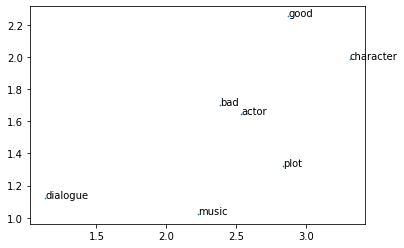

In [35]:
#graphique dans le plan
import matplotlib.pyplot as plt
plt.scatter(dfMots.V1,dfMots.V2,s=0.5)
for i in range(dfMots.shape[0]):
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

# Word2Vec - Travailler avec un modèle pré-entraîné

In [36]:
#voir -- https://fauconnier.github.io/
from gensim.models import keyedvectors
trained = keyedvectors.load_word2vec_format("frWac_non_lem_no_postag_no_phrase_500_skip_cut100.bin",binary=True,unicode_errors='ignore')
#taille du dictionnaire
print(len(trained.key_to_index))

155562


In [37]:
#similarité avec Benzema
trained.most_similar(positive=["benzema"])

[('arfa', 0.913178563117981),
 ('govou', 0.9104522466659546),
 ('juninho', 0.8955627679824829),
 ('toulalan', 0.8621358275413513),
 ('malouda', 0.8552051186561584),
 ('coupet', 0.8476995229721069),
 ('kallstrom', 0.8429117798805237),
 ('baros', 0.8416147828102112),
 ('abidal', 0.8360183238983154),
 ('wiltord', 0.8322257399559021)]

In [38]:
#similarité avec Benzema sans l'ol (olympique lyonnais)
trained.most_similar(positive=["benzema"],negative=["ol"])

[('malouda', 0.43094778060913086),
 ('vieira', 0.42352476716041565),
 ('sagnol', 0.42134761810302734),
 ('thuram', 0.4146784842014313),
 ('anelka', 0.41370975971221924),
 ('toulalan', 0.40895143151283264),
 ('makelele', 0.4072572886943817),
 ('trezeguet', 0.3994947373867035),
 ('evra', 0.3987172544002533),
 ('govou', 0.39852991700172424)]

# Doc2Vec avec gensim

In [39]:
#tagger les documents avec leur identifiant
from gensim.models.doc2vec import TaggedDocument
tagged_docs = [TaggedDocument(words=corpus_sw[i],tags=["d"+str(D.ID[i])]) for i in range(len(corpus_sw))]

#premier doc par ex.
print(tagged_docs[0])

TaggedDocument(['guy', 'idea', 'cinema', 'okay', 'seems', 'made', 'interestig', 'theater', 'show', 'youth', 'two', 'acceptable', 'movie', 'success', 'political', 'reason', 'cause', 'tricked', 'communist', 'censorship', 'good', 'look', 'carefully', 'doe', 'know', 'job', 'scene', 'unbalanced', 'without', 'proper', 'start', 'disordered', 'content', 'full', 'emptiness', 'nothing', 'say', 'subject', 'overlicitates', 'violence', 'nakedness', 'gutter', 'language', 'possible', 'keep', 'alive', 'rotten', 'corpse', 'never', 'understood', 'anything', 'cinematographic', 'profession', 'art', 'dont', 'let', 'succumb', 'piece'], ['d1'])


In [40]:
#second doc.
print(tagged_docs[1])

TaggedDocument(['movie', 'extremely', 'depressing', 'character', 'cold', 'mother', 'main', 'character', 'everything', 'motherly', 'unhappy', 'marriage', 'always', 'put', 'husband', 'child', 'first', 'husband', 'visit', 'son', 'meet', 'hunk', 'sleeping', 'daughter', 'end', 'sleeping', 'part', 'movie', 'right', 'excellent', 'watched', 'guy', 'charming', 'blame', 'motherly', 'sleep', 'daughter', 'lover', 'let', 'blame', 'shock', 'losing', 'husband', 'becomes', 'totally', 'obsessed', 'guy', 'think', 'part', 'started', 'dislike', 'movie', 'shes', 'always', 'wanting', 'please', 'old', 'fashioned', 'way', 'snack', 'working', 'son', 'house', 'guess', 'thing', 'ever', 'learned', 'way', 'could', 'get', 'attention', 'guy', 'obviously', 'interested', 'actually', 'seems', 'like', 'considered', 'sleeping', 'charitable', 'activity', 'instead', 'insulted', 'continues', 'beg', 'bed', 'nice', 'becomes', 'abusive', 'want', 'please', 'tell', 'desperate', 'way', 'insulting', 'badly', 'outraged', 'movie', '

In [41]:
#doc2vec
from gensim.models.doc2vec import Doc2Vec
modeleDoc = Doc2Vec(vector_size=2,window=5)

#construction de dictionnaire dans un premier temps
modeleDoc.build_vocab(tagged_docs)

In [42]:
#coordonnées des termes - comme avec doc2vec
pandas.DataFrame(modeleDoc.wv.vectors,columns=['V1','V2'],index=modeleDoc.wv.key_to_index.keys())

,V1,V2
film,-0.026811,0.011822
movie,0.255167,0.450464
one,-0.465147,-0.355840
like,0.322944,0.448649
character,-0.250771,-0.188169
...,...,...
hardly,0.203586,0.450866
travel,-0.151883,-0.291927
turtle,0.150994,-0.021792
forever,-0.498972,0.420885


In [43]:
#modélisation pour le positionnement des documents
modeleDoc.train(tagged_docs,total_examples=modeleDoc.corpus_count,epochs=100)
print(modeleDoc.dv)

In [ ]:
#coordonnées des documents
#print(modeleDoc.dv.key_to_index)

In [44]:
#data frame avec les coordonnées
dfDoc2Vec = pandas.DataFrame(modeleDoc.dv.vectors,columns=['X1','X2'])
print(dfDoc2Vec)

           X1        X2
0   -0.616892  2.129723
1    0.236581  2.737840
2   -0.392282  2.317758
3    0.117344  3.013039
4   -2.857508  0.032675
..        ...       ...
195 -1.558749  0.654467
196 -0.582765  1.513740
197 -3.515436 -0.829151
198  1.048651  3.434941
199 -5.043906 -1.480523

[200 rows x 2 columns]


<AxesSubplot:xlabel='X1', ylabel='X2'>

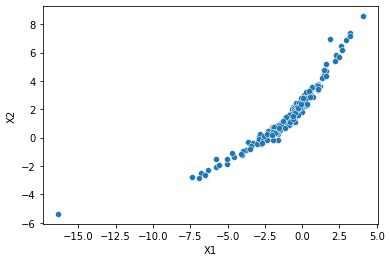

In [45]:
#graphique
import seaborn as sns
sns.scatterplot(data=dfDoc2Vec,x='X1',y='X2')

In [46]:
#le document dans le quart sud-ouest
dfDoc2Vec.loc[dfDoc2Vec.X1 < -15,:]

,X1,X2
124,-16.358557,-5.379943


In [47]:
#doc corresp. au point dans le quart sud-ouest
D.commentaires[124]

'Coming immediately on the heels of Match Point (2005), a fine if somewhat self-repetitive piece of "serious Woody," Scoop gives new hope to Allen\'s small but die-hard band of followers (among whom I number myself) that the master has once again found his form. A string of disappointing efforts, culminating in the dreary Melinda and Melinda (2004) and the embarrassing Anything Else (2003) raised serious doubts that another first rate Woody comedy, with or without his own participation as an actor, was in the cards. Happily, the cards turn out to be a Tarot deck that serves as Scoop\'s clever Maguffin and proffers an optimistic reading for the future of Woody Allen comedy.  Even more encouraging, Woody\'s self-casting - sadly one of the weakest elements of his films in recent years - is here an inspired bit of self-parody as well as a humble recognition at last that he can no longer play romantic leads with women young enough to be his daughters or granddaughters. In Scoop, Allen astut

In [48]:
#point quart nord-est
dfDoc2Vec.loc[dfDoc2Vec.X1 > 4,:]

,X1,X2
53,4.053157,8.560942


In [49]:
#commentaire n°53
D.commentaires[53]

'We now travel to a parallel universe where the appearance of giant prehistoric monsters flattening cities are part of the daily routine. It\'s the world of Godzilla, Rodan, Mothra Ghidrah and their kind - a strange world, and one made even stranger by the appearance of an unidentified flying turtle called Gamera.  Forever in the shadow of the monolithic Toho Studios, second rung Daiei Studios were more famous for samurai sagas than monster movies. In the mid 60s they decided to join the giant reptile race and designed a rival monster series to Toho\'s mammothly successful Godzilla. They wisely chose Gamera as their flagship - a giant turtle that shoots flames from between its snaggle-teeth, and spins through the air by shooting flames through its shell\'s feet-holes (and at one point you almost see the paper mache shell catch fire!).  The first Gamera film "Gamera The Invincible" (as it was sold to the US) is a virtual mirror of the first Godzilla film, only 10 years behind. American 

<AxesSubplot:xlabel='X1', ylabel='X2'>

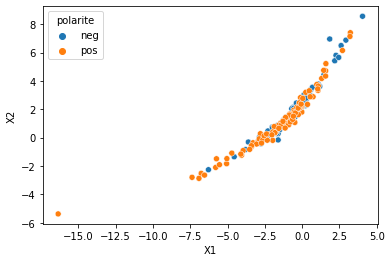

In [50]:
#ajouter la polarité
dfDoc2Vec['polarite'] = D.label

#refaire le graphique avec la polarité
sns.scatterplot(data=dfDoc2Vec,x='X1',y='X2',hue='polarite')